# GaussianMixture

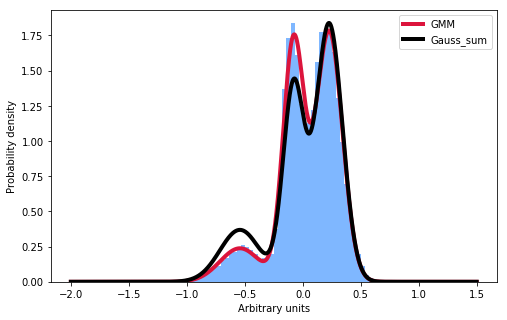

In [1]:
#!/opt/local/bin/python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Define simple gaussian
def gauss_function(x, amp, x0, sigma):
    return amp * np.exp(-(x - x0) ** 2. / (2. * sigma ** 2.))

# Generate sample from three gaussian distributions
samples = np.random.normal(-0.5, 0.2, 2000)
samples = np.append(samples, np.random.normal(-0.1, 0.07, 5000))
samples = np.append(samples, np.random.normal(0.2, 0.13, 10000))

# Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type="full", tol=0.001)
gmm = gmm.fit(X=np.expand_dims(samples, 1))

# Evaluate GMM
gmm_x = np.linspace(-2, 1.5, 5000)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1, 1)))

# Construct function manually as sum of gaussians
gmm_y_sum = np.full_like(gmm_x, fill_value=0, dtype=np.float32)
for m, c, w in zip(gmm.means_.ravel(), gmm.covariances_.ravel(), 
               gmm.weights_.ravel()):
    gmm_y_sum += gauss_function(x=gmm_x, amp=w, x0=m, sigma=np.sqrt(c))

# Normalize so that integral is 1    
gmm_y_sum /= np.trapz(gmm_y_sum, gmm_x)

# Make regular histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[8, 5])
ax.hist(samples, bins=50, normed=True, alpha=0.5, color="#0070FF")
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")
ax.plot(gmm_x, gmm_y_sum, color="black", lw=4, label="Gauss_sum")

# Annotate diagram
ax.set_ylabel("Probability density")
ax.set_xlabel("Arbitrary units")

# Draw legend
plt.legend()
plt.show()


In [2]:
gmm.bic(np.expand_dims(samples,1))

-977.7855746602718

# ArdGaussianMixture

Best number of components: 4


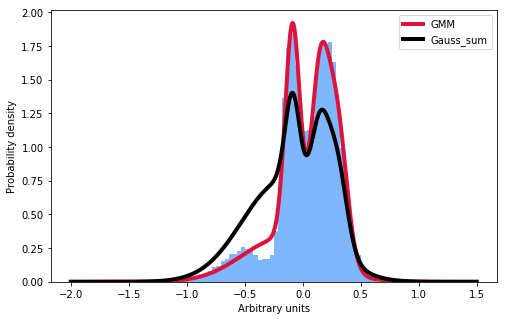

In [16]:
import sys
sys.path.append('../code/')
import gaussian_ard_mixture; reload(gaussian_ard_mixture)
from gaussian_ard_mixture import ArdGaussianMixture
gmm = ArdGaussianMixture(init_components=60, covariance_type="full", tol=0.001)
gmm = gmm.fit(X=np.expand_dims(samples, 1))

print('Best number of components: %d' % gmm.n_components)

# Evaluate GMM
gmm_x = np.linspace(-2, 1.5, 5000)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1, 1)))

# Construct function manually as sum of gaussians
gmm_y_sum = np.full_like(gmm_x, fill_value=0, dtype=np.float32)
for m, c, w in zip(gmm.means_.ravel(), gmm.covariances_.ravel(), 
               gmm.weights_.ravel()):
    gmm_y_sum += gauss_function(x=gmm_x, amp=w, x0=m, sigma=np.sqrt(c))

# Normalize so that integral is 1    
gmm_y_sum /= np.trapz(gmm_y_sum, gmm_x)

# Make regular histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[8, 5])
ax.hist(samples, bins=50, normed=True, alpha=0.5, color="#0070FF")
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")
ax.plot(gmm_x, gmm_y_sum, color="black", lw=4, label="Gauss_sum")

# Annotate diagram
ax.set_ylabel("Probability density")
ax.set_xlabel("Arbitrary units")

# Draw legend
plt.legend()
plt.show()

In [ ]:
gmm.bic(np.expand_dims(samples,1))